In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [68]:
df_industrial = pd.read_csv("Renewable Energy Consumption - Industrial Sector.csv")
df_residentcommercial = pd.read_csv("Renewable Energy Consumption - Residential and Commercial Sectors.csv")
df_transportelectric = pd.read_csv("Renewable Energy Consumption - Transportation and Electric Power Sectors.csv")

# Data Cleansing
#### Step 1: Cleaning Datasets
- Use Python functions to make data more readable
- Adjust object types
- Correct null values
#### Step 2: Analyze the Dataset
- Check for monthly consumption trends
    - Break this down further into energy sectors & consumer sectors
- Check for annual consumption trends
    - Break this down further into energy sectors & consumer sectors
#### Step 3: Insights

# Making Industrial data more readable:

In [69]:
print(df_industrial.columns)

energy_sectors= df_industrial['MSN'].unique()
print(energy_sectors)

descriptions= df_industrial['Description'].unique()
print(descriptions)

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')
['HVICBUS' 'GEICBUS' 'SOICBUS' 'WYICBUS' 'WDICBUS' 'WSICBUS' 'EMICBUS'
 'BFLCBUS' 'BMICBUS' 'REICBUS']
['Hydroelectric Power Consumed by the Industrial Sector'
 'Geothermal Energy Consumed by the Industrial Sector'
 'Solar Energy Consumed by the Industrial Sector'
 'Wind Energy Consumed by the Industrial Sector'
 'Wood Energy Consumed by the Industrial Sector'
 'Waste Energy Consumed by the Industrial Sector'
 'Fuel Ethanol, Excluding Denaturant, Consumed by the Industrial Sector'
 'Biomass Losses and Co-products in the Industrial Sector'
 'Biomass Energy Consumed by the Industrial Sector'
 'Total Renewable Energy Consumed by the Industrial Sector']


In [70]:
energy_sector_rename = {'HVICBUS': 'Hydroelectric Power', 'GEICBUS': 'Geothermal Energy', 'SOICBUS':'Solar Energy',
                        'WYICBUS':'Wind Energy', 'WDICBUS':'Wood Energy', 'WSICBUS':'Waste Energy', 'EMICBUS': 'Fuel Ethanol',
                        'BFLCBUS':'Biomass Losses and Co-products', 'BMICBUS':'Biomass Energy', 'REICBUS':'Total Renewable Energy'}
df_industrial['MSN'] = df_industrial['MSN'].replace(energy_sector_rename)
print(df_industrial['MSN'])
print(df_industrial)

0          Hydroelectric Power
1          Hydroelectric Power
2          Hydroelectric Power
3          Hydroelectric Power
4          Hydroelectric Power
                 ...          
6795    Total Renewable Energy
6796    Total Renewable Energy
6797    Total Renewable Energy
6798    Total Renewable Energy
6799    Total Renewable Energy
Name: MSN, Length: 6800, dtype: object
                         MSN  YYYYMM    Value  Column_Order  \
0        Hydroelectric Power  194913   17.144             1   
1        Hydroelectric Power  195013   16.877             1   
2        Hydroelectric Power  195113   15.782             1   
3        Hydroelectric Power  195213   15.715             1   
4        Hydroelectric Power  195313   14.958             1   
...                      ...     ...      ...           ...   
6795  Total Renewable Energy  202302  174.359            10   
6796  Total Renewable Energy  202303  188.926            10   
6797  Total Renewable Energy  202304  176.881        

In [71]:
df_industrial['YYYYMM'] = df_industrial['YYYYMM'].astype(str)

df_industrial['Year'] = pd.to_datetime(df_industrial['YYYYMM'].str[:4], format='%Y')
df_industrial['Month'] = pd.to_numeric(df_industrial['YYYYMM'].str[4:])
df_industrial['Month'] = df_industrial['Month'].replace(13, np.nan)
df_industrial['Month'] = df_industrial['Month'].astype('Int64')
df_industrial['Month'] = df_industrial.apply(lambda row: pd.Timestamp(year=row['Year'].year, month=row['Month'], day=1) if pd.notna(row['Month']) else pd.NaT, axis=1)

print(df_industrial)

                         MSN  YYYYMM    Value  Column_Order  \
0        Hydroelectric Power  194913   17.144             1   
1        Hydroelectric Power  195013   16.877             1   
2        Hydroelectric Power  195113   15.782             1   
3        Hydroelectric Power  195213   15.715             1   
4        Hydroelectric Power  195313   14.958             1   
...                      ...     ...      ...           ...   
6795  Total Renewable Energy  202302  174.359            10   
6796  Total Renewable Energy  202303  188.926            10   
6797  Total Renewable Energy  202304  176.881            10   
6798  Total Renewable Energy  202305  188.425            10   
6799  Total Renewable Energy  202306  179.891            10   

                                            Description          Unit  \
0     Hydroelectric Power Consumed by the Industrial...  Trillion Btu   
1     Hydroelectric Power Consumed by the Industrial...  Trillion Btu   
2     Hydroelectric Powe

In [72]:
#df_industrial['Year'] = df_industrial['Year'].dt.strftime('%Y')
#df_industrial['Month'] = df_industrial['Month'].replace(13, np.nan)
#df_industrial['Month'] = df_industrial['Month'].dt.strftime('%m')
df_industrial['Sector'] = 'Industrial Sector'
df_industrial.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Year,Month,Sector
0,Hydroelectric Power,194913,17.144,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1949-01-01,NaT,Industrial Sector
1,Hydroelectric Power,195013,16.877,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1950-01-01,NaT,Industrial Sector
2,Hydroelectric Power,195113,15.782,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1951-01-01,NaT,Industrial Sector
3,Hydroelectric Power,195213,15.715,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1952-01-01,NaT,Industrial Sector
4,Hydroelectric Power,195313,14.958,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1953-01-01,NaT,Industrial Sector


# Making Residential & Commercial data more readable:

In [73]:
print(df_residentcommercial.columns)

energy_sectors2= df_residentcommercial['MSN'].unique()
print(energy_sectors2)

descriptions2= df_residentcommercial['Description'].unique()
print(descriptions2)

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')
['GERCBUS' 'SORCBUS' 'WDRCBUS' 'RERCBUS' 'HVCCBUS' 'GECCBUS' 'SOCCBUS'
 'WYCCBUS' 'WDCCBUS' 'WSCCBUS' 'EMCCBUS' 'BMCCBUS' 'RECCBUS']
['Geothermal Energy Consumed by the Residential Sector'
 'Solar Energy Consumed by the Residential Sector'
 'Wood Energy Consumed by the Residential Sector'
 'Total Renewable Energy Consumed by the Residential Sector'
 'Hydroelectric Power Consumed by the Commercial Sector'
 'Geothermal Energy Consumed by the Commercial Sector'
 'Solar Energy Consumed by the Commercial Sector'
 'Wind Energy Consumed by the Commercial Sector'
 'Wood Energy Consumed by the Commercial Sector'
 'Waste Energy Consumed by the Commercial Sector'
 'Fuel Ethanol, Excluding Denaturant, Consumed by the Commercial Sector'
 'Biomass Energy Consumed by the Commercial Sector'
 'Total Renewable Energy Consumed by the Commercial Sector']


In [74]:
df_residentcommercial['Sector'] = df_residentcommercial['MSN'].apply(lambda x: 'Residential Sector'
                                                                     if x in ['GERCBUS','SORCBUS','WDRCBUS','RERCBUS'] 
                                                                     else 'Commercial Sector')
df_residentcommercial.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector
0,GERCBUS,194913,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
1,GERCBUS,195013,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
2,GERCBUS,195113,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
3,GERCBUS,195213,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
4,GERCBUS,195313,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector


In [75]:
energy_sector_rename2 = {'GERCBUS': 'Geothermal Energy','SORCBUS': 'Solar Energy','WDRCBUS': 'Wood Energy',
                         'RERCBUS': 'Total Renewable Energy','HVCCBUS': 'Hydroelectric Power','GECCBUS': 'Geothermal Energy',
                         'SOCCBUS': 'Solar Energy','WYCCBUS': 'Wind Energy','WDCCBUS': 'Wood Energy',
                         'WSCCBUS': 'Waste Energy','EMCCBUS': 'Fuel Ethanol','BMCCBUS': 'Biomass Energy','RECCBUS': 'Total Renewable Energy'}
df_residentcommercial['MSN'] = df_residentcommercial['MSN'].replace(energy_sector_rename2)
df_residentcommercial.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector
0,Geothermal Energy,194913,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
1,Geothermal Energy,195013,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
2,Geothermal Energy,195113,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
3,Geothermal Energy,195213,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector
4,Geothermal Energy,195313,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector


In [76]:
df_residentcommercial['YYYYMM'] = df_residentcommercial['YYYYMM'].astype(str)

df_residentcommercial['Year'] = pd.to_datetime(df_residentcommercial['YYYYMM'].str[:4], format='%Y')
df_residentcommercial['Month'] = pd.to_numeric(df_residentcommercial['YYYYMM'].str[4:])
df_residentcommercial['Month'] = df_residentcommercial['Month'].replace(13, np.nan)
df_residentcommercial['Month'] = df_residentcommercial['Month'].astype('Int64')
df_residentcommercial['Month'] = df_residentcommercial.apply(lambda row: pd.Timestamp(year=row['Year'].year, month=row['Month'], day=1) if pd.notna(row['Month']) else pd.NaT, axis=1)

df_residentcommercial.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector,Year,Month
0,Geothermal Energy,194913,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector,1949-01-01,NaT
1,Geothermal Energy,195013,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector,1950-01-01,NaT
2,Geothermal Energy,195113,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector,1951-01-01,NaT
3,Geothermal Energy,195213,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector,1952-01-01,NaT
4,Geothermal Energy,195313,Not Available,1,Geothermal Energy Consumed by the Residential ...,Trillion Btu,Residential Sector,1953-01-01,NaT


# Making Transportation and Electric Power data more readable:

In [77]:
print(df_transportelectric.columns)

energy_sectors3= df_transportelectric['MSN'].unique()
print(energy_sectors3)

descriptions3= df_transportelectric['Description'].unique()
print(descriptions3)

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')
['EMACBUS' 'BDACBUS' 'B1ACBUS' 'BOACBUS' 'BMACBUS' 'HVEGBUS' 'GEEGBUS'
 'SOEGBUS' 'WYEGBUS' 'WDEIBUS' 'WSEIBUS' 'BMEIBUS' 'REEIBUS']
['Fuel Ethanol, Excluding Denaturant, Consumed by the Transportation Sector'
 'Biodiesel Consumed by the Transportation Sector'
 'Renewable Diesel Fuel Consumed by the Transportation Sector '
 'Other Biofuels Consumed by the Transportation Sector '
 'Biomass Energy Consumed by the Transportation Sector'
 'Conventional Hydroelectric Power Consumed by the Electric Power Sector'
 'Geothermal Energy Consumed by the Electric Power Sector'
 'Solar Energy Consumed by the Electric Power Sector'
 'Wind Energy Consumed by the Electric Power Sector'
 'Wood Energy Consumed by the Electric Power Sector'
 'Waste Energy Consumed by the Electric Power Sector'
 'Biomass Energy Consumed by the Electric Power Sector'
 'Total Renewable Energy Consumed by the Electric Power Sector']


In [78]:
df_transportelectric['Sector'] = df_transportelectric['MSN'].apply(lambda x: 'Transportation Sector'
                                                                     if x in ['EMACBUS','BDACBUS','B1ACBUS','BOACBUS','BMACBUS'] 
                                                                     else 'Electric Power Sector')
df_transportelectric.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector
0,EMACBUS,194913,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
1,EMACBUS,195013,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
2,EMACBUS,195113,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
3,EMACBUS,195213,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
4,EMACBUS,195313,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector


In [79]:
energy_sector_rename3 = {'EMACBUS': 'Fuel Ethanol, Excluding Denaturant','BDACBUS': 'Biodiesel',
                         'B1ACBUS': 'Renewable Diesel Fuel','BOACBUS': 'Other Biofuels','BMACBUS': 'Biomass Energy',
                         'HVEGBUS': 'Hydroelectric Power','GEEGBUS': 'Geothermal Energy','SOEGBUS': 'Solar Energy',
                         'WYEGBUS': 'Wind Energy','WDEIBUS': 'Wood Energy','WSEIBUS': 'Waste Energy',
                         'BMEIBUS': 'Biomass Energy','REEIBUS': 'Total Renewable Energy'}
df_transportelectric['MSN'] = df_transportelectric['MSN'].replace(energy_sector_rename3)
df_transportelectric.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector
0,"Fuel Ethanol, Excluding Denaturant",194913,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
1,"Fuel Ethanol, Excluding Denaturant",195013,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
2,"Fuel Ethanol, Excluding Denaturant",195113,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
3,"Fuel Ethanol, Excluding Denaturant",195213,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector
4,"Fuel Ethanol, Excluding Denaturant",195313,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector


In [80]:
df_transportelectric['YYYYMM'] = df_transportelectric['YYYYMM'].astype(str)

df_transportelectric['Year'] = pd.to_datetime(df_transportelectric['YYYYMM'].str[:4], format='%Y')
df_transportelectric['Month'] = pd.to_numeric(df_transportelectric['YYYYMM'].str[4:])
df_transportelectric['Month'] = df_transportelectric['Month'].replace(13, np.nan)
df_transportelectric['Month'] = df_transportelectric['Month'].astype('Int64')
df_transportelectric['Month'] = df_transportelectric.apply(lambda row: pd.Timestamp(year=row['Year'].year, month=row['Month'], day=1) if pd.notna(row['Month']) else pd.NaT, axis=1)

df_transportelectric.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Sector,Year,Month
0,"Fuel Ethanol, Excluding Denaturant",194913,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector,1949-01-01,NaT
1,"Fuel Ethanol, Excluding Denaturant",195013,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector,1950-01-01,NaT
2,"Fuel Ethanol, Excluding Denaturant",195113,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector,1951-01-01,NaT
3,"Fuel Ethanol, Excluding Denaturant",195213,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector,1952-01-01,NaT
4,"Fuel Ethanol, Excluding Denaturant",195313,Not Available,1,"Fuel Ethanol, Excluding Denaturant, Consumed b...",Trillion Btu,Transportation Sector,1953-01-01,NaT


# Merging Industrial, Residential and Commercial, and Transportation and Electric Power Sector dataframes into one:

In [81]:
renewable_energy_df = pd.concat([df_industrial,df_residentcommercial,df_transportelectric], ignore_index=True)
print(renewable_energy_df)

                          MSN  YYYYMM    Value  Column_Order  \
0         Hydroelectric Power  194913   17.144             1   
1         Hydroelectric Power  195013   16.877             1   
2         Hydroelectric Power  195113   15.782             1   
3         Hydroelectric Power  195213   15.715             1   
4         Hydroelectric Power  195313   14.958             1   
...                       ...     ...      ...           ...   
24475  Total Renewable Energy  202302  274.811            13   
24476  Total Renewable Energy  202303  299.174            13   
24477  Total Renewable Energy  202304  287.796            13   
24478  Total Renewable Energy  202305  297.258            13   
24479  Total Renewable Energy  202306  253.993            13   

                                             Description          Unit  \
0      Hydroelectric Power Consumed by the Industrial...  Trillion Btu   
1      Hydroelectric Power Consumed by the Industrial...  Trillion Btu   
2      Hy

In [82]:
renewable_energy_df['Value'] = renewable_energy_df['Value'].replace('Not Available', np.nan)
renewable_energy_df['Value'] = renewable_energy_df['Value'].replace('No Data Reported', np.nan)
renewable_energy_df['Value'] = renewable_energy_df['Value'].replace('Not Meaningful', np.nan)
renewable_energy_df['Value'] = renewable_energy_df['Value'].astype(float)
renewable_energy_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Year,Month,Sector
0,Hydroelectric Power,194913,17.144,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1949-01-01,NaT,Industrial Sector
1,Hydroelectric Power,195013,16.877,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1950-01-01,NaT,Industrial Sector
2,Hydroelectric Power,195113,15.782,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1951-01-01,NaT,Industrial Sector
3,Hydroelectric Power,195213,15.715,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1952-01-01,NaT,Industrial Sector
4,Hydroelectric Power,195313,14.958,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1953-01-01,NaT,Industrial Sector


In [83]:
## Now, let's double check that the MSN column doesn't have redundancies in energy names - which were given per the
## description of each row of data.
energy_types= renewable_energy_df['MSN'].unique()
print(energy_types)

renewable_energy_df['MSN'] = renewable_energy_df['MSN'].replace("Fuel Ethanol, Excluding Denaturant", "Fuel Ethanol")
energy_types= renewable_energy_df['MSN'].unique()
print(energy_types)

['Hydroelectric Power' 'Geothermal Energy' 'Solar Energy' 'Wind Energy'
 'Wood Energy' 'Waste Energy' 'Fuel Ethanol'
 'Biomass Losses and Co-products' 'Biomass Energy'
 'Total Renewable Energy' 'Fuel Ethanol, Excluding Denaturant' 'Biodiesel'
 'Renewable Diesel Fuel' 'Other Biofuels']
['Hydroelectric Power' 'Geothermal Energy' 'Solar Energy' 'Wind Energy'
 'Wood Energy' 'Waste Energy' 'Fuel Ethanol'
 'Biomass Losses and Co-products' 'Biomass Energy'
 'Total Renewable Energy' 'Biodiesel' 'Renewable Diesel Fuel'
 'Other Biofuels']


In [84]:
renewable_energy_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Year,Month,Sector
0,Hydroelectric Power,194913,17.144,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1949-01-01,NaT,Industrial Sector
1,Hydroelectric Power,195013,16.877,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1950-01-01,NaT,Industrial Sector
2,Hydroelectric Power,195113,15.782,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1951-01-01,NaT,Industrial Sector
3,Hydroelectric Power,195213,15.715,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1952-01-01,NaT,Industrial Sector
4,Hydroelectric Power,195313,14.958,1,Hydroelectric Power Consumed by the Industrial...,Trillion Btu,1953-01-01,NaT,Industrial Sector


# 1st Part of Analysis:
- Check for monthly consumption trends

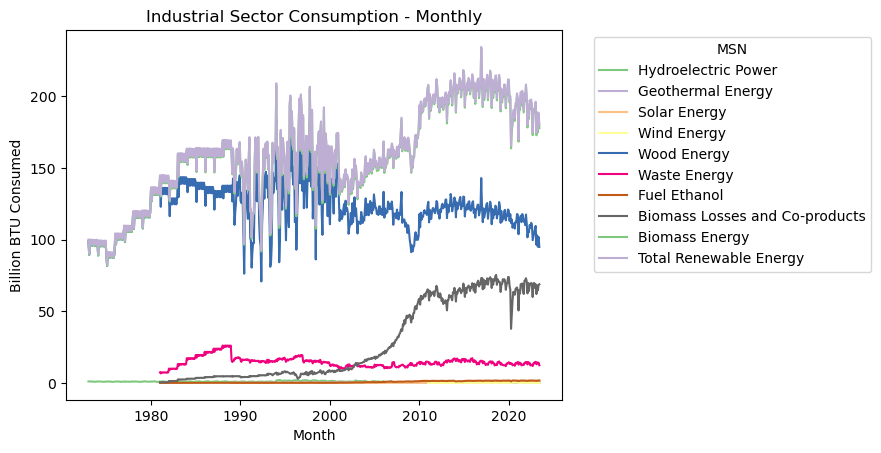

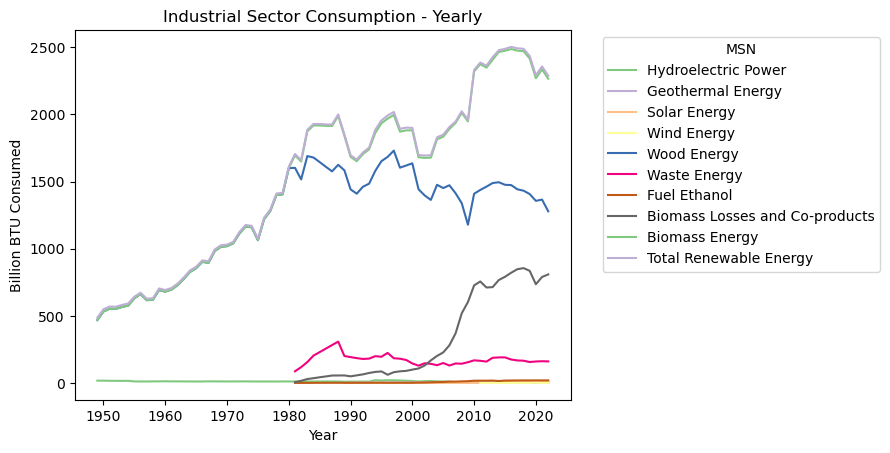

In [85]:
filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Industrial Sector') & ~renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Month', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Industrial Sector Consumption - Monthly')
plt.xlabel('Month')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Industrial Sector') & renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Year', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Industrial Sector Consumption - Yearly')
plt.xlabel('Year')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

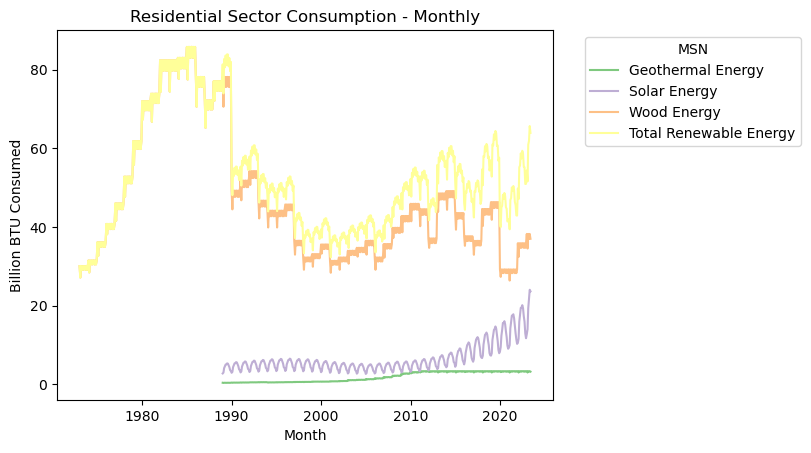

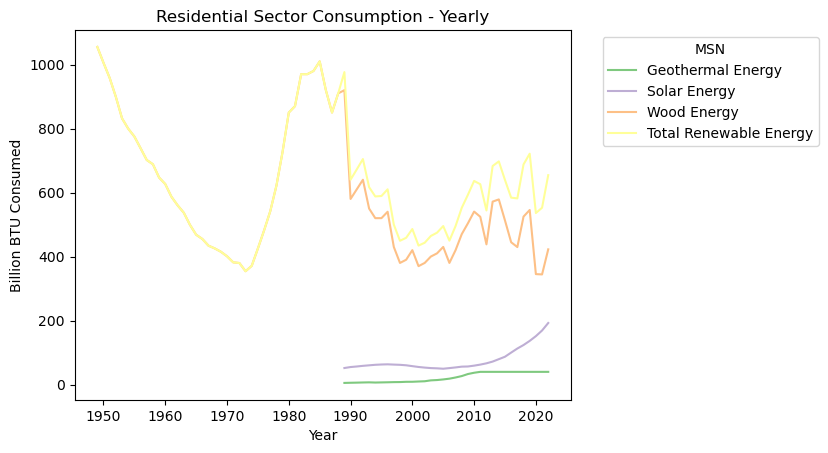

In [86]:
filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Residential Sector') & ~renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Month', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Residential Sector Consumption - Monthly')
plt.xlabel('Month')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Residential Sector') & renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Year', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Residential Sector Consumption - Yearly')
plt.xlabel('Year')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

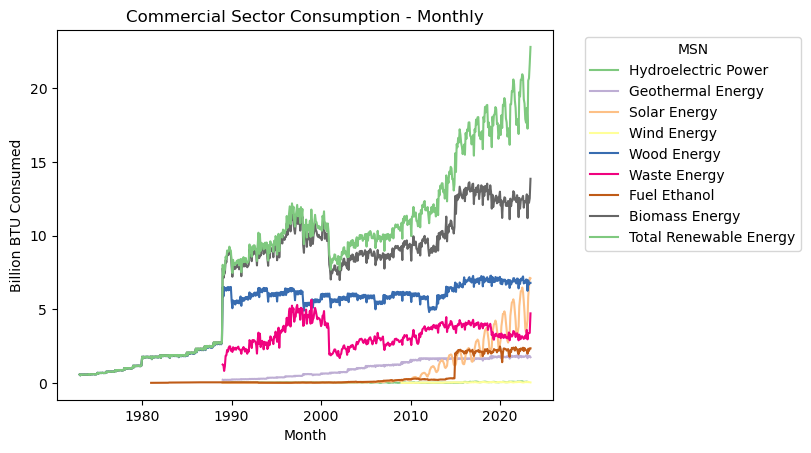

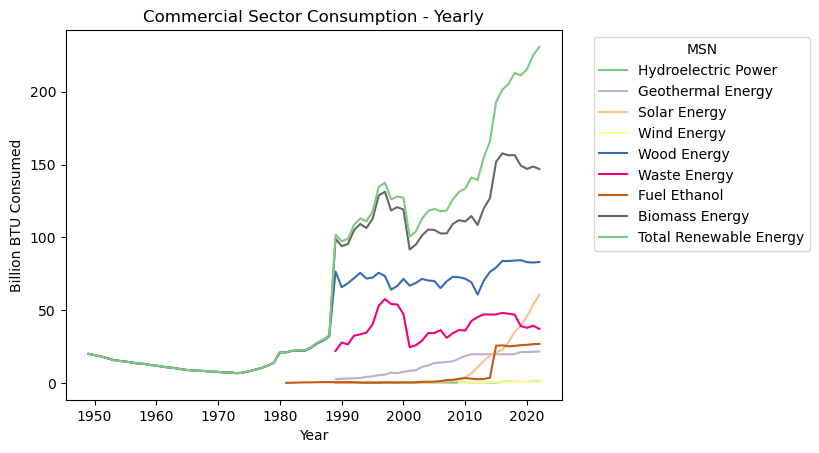

In [87]:
filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Commercial Sector') & ~renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Month', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Commercial Sector Consumption - Monthly')
plt.xlabel('Month')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Commercial Sector') & renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Year', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Commercial Sector Consumption - Yearly')
plt.xlabel('Year')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

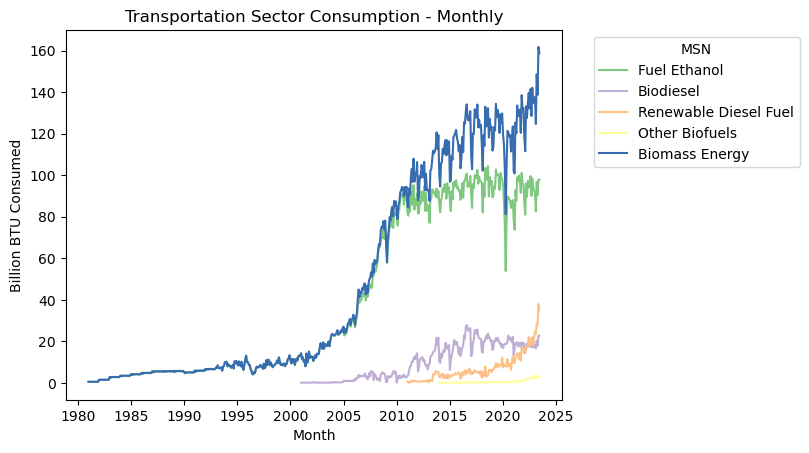

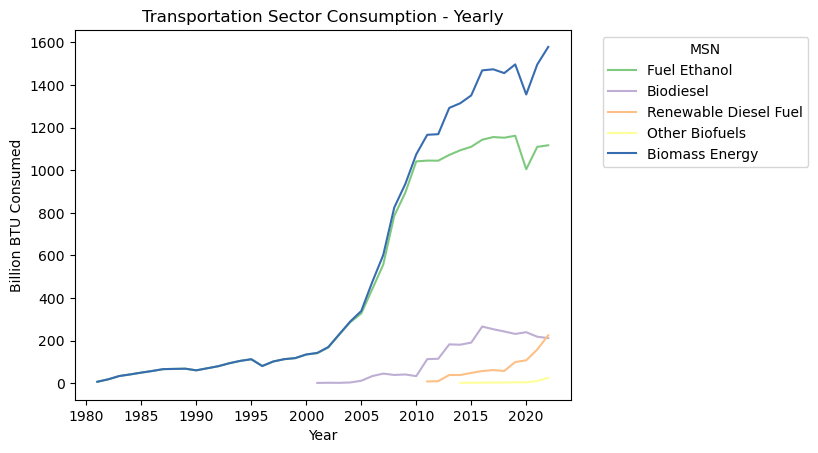

In [88]:
filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Transportation Sector') & ~renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Month', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Transportation Sector Consumption - Monthly')
plt.xlabel('Month')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Transportation Sector') & renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Year', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Transportation Sector Consumption - Yearly')
plt.xlabel('Year')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

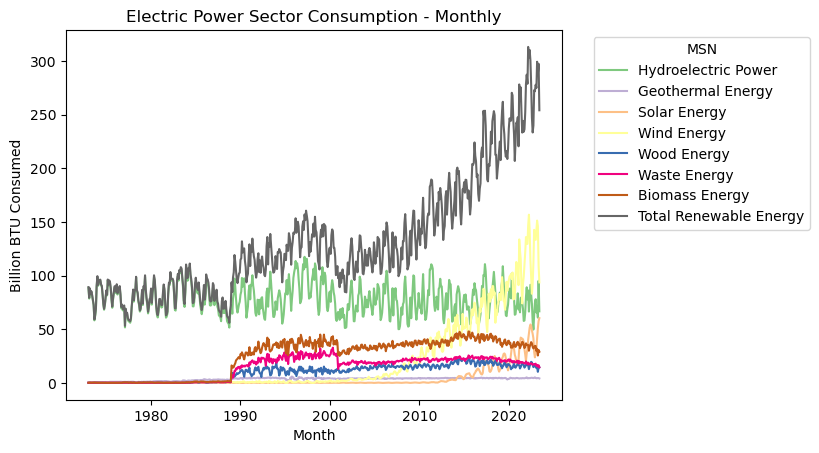

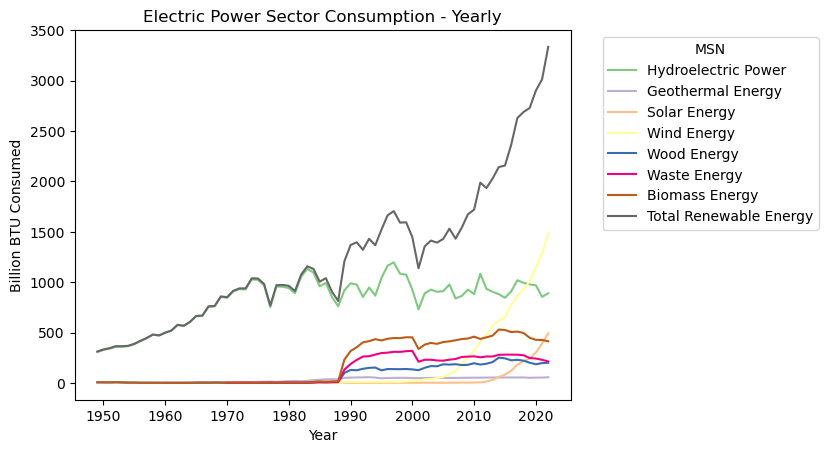

In [89]:
filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Electric Power Sector') & ~renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Month', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Electric Power Sector Consumption - Monthly')
plt.xlabel('Month')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

filtered_df = renewable_energy_df[(renewable_energy_df['Sector'] == 'Electric Power Sector') & renewable_energy_df['Month'].isnull()]
sns.lineplot(x='Year', y='Value', hue='MSN', data=filtered_df, palette='Accent', errorbar=None)
plt.title('Electric Power Sector Consumption - Yearly')
plt.xlabel('Year')
plt.ylabel('Billion BTU Consumed')
plt.yticks(rotation=0)
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

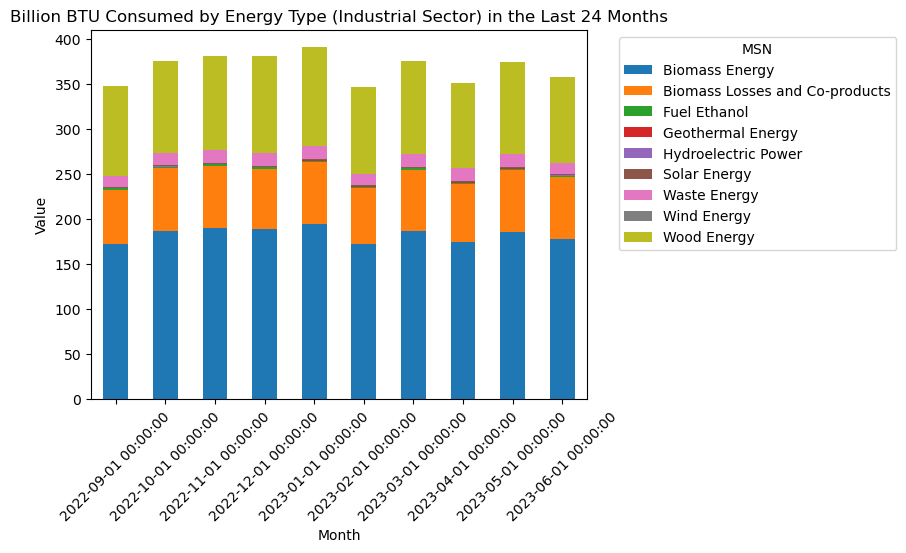

In [90]:
re_df_industrial = renewable_energy_df[renewable_energy_df['Sector'] == 'Industrial Sector']

re_df_industrial_recent_months = re_df_industrial[(re_df_industrial['MSN'] != 'Total Renewable Energy') & 
                                                  ~re_df_industrial['Month'].isnull()].sort_values('Month', ascending=False).head(90)

re_df_industrial_recent_months_pivot = re_df_industrial_recent_months.pivot(index='Month', columns='MSN', values='Value')

plt.figure(figsize=(12, 8))
re_df_industrial_recent_months_pivot.plot(kind='bar', stacked=True)
plt.title('Billion BTU Consumed by Energy Type (Industrial Sector) in the Last 24 Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

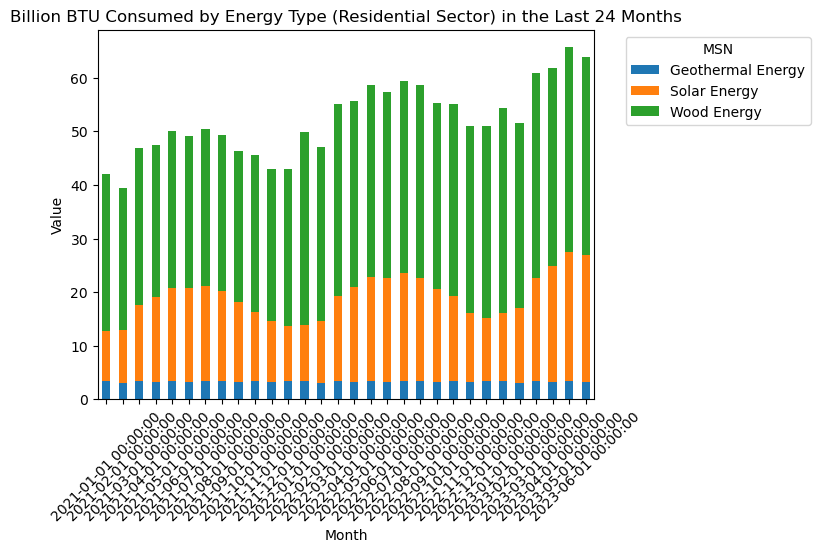

In [91]:
re_df_residential = renewable_energy_df[renewable_energy_df['Sector'] == 'Residential Sector']

re_df_residential_recent_months = re_df_residential[(re_df_residential['MSN'] != 'Total Renewable Energy') & 
                                                  ~re_df_residential['Month'].isnull()].sort_values('Month', ascending=False).head(90)

re_df_residential_recent_months_pivot = re_df_residential_recent_months.pivot(index='Month', columns='MSN', values='Value')

plt.figure(figsize=(12, 8))
re_df_residential_recent_months_pivot.plot(kind='bar', stacked=True)
plt.title('Billion BTU Consumed by Energy Type (Residential Sector) in the Last 24 Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

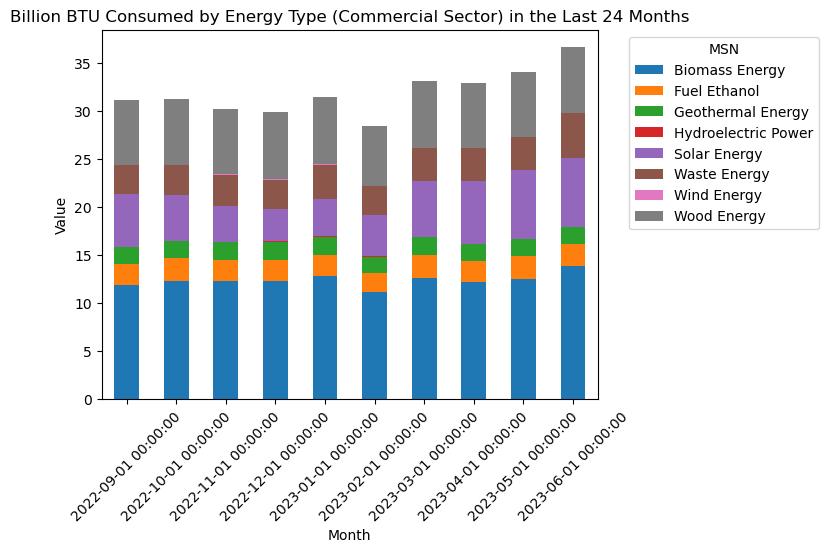

In [92]:
re_df_commercial = renewable_energy_df[renewable_energy_df['Sector'] == 'Commercial Sector']

re_df_commercial_recent_months = re_df_commercial[(re_df_commercial['MSN'] != 'Total Renewable Energy') & 
                                                  ~re_df_commercial['Month'].isnull()].sort_values('Month', ascending=False).head(80)

re_df_commercial_recent_months_pivot = re_df_commercial_recent_months.pivot(index='Month', columns='MSN', values='Value')

plt.figure(figsize=(12, 8))
re_df_commercial_recent_months_pivot.plot(kind='bar', stacked=True)
plt.title('Billion BTU Consumed by Energy Type (Commercial Sector) in the Last 24 Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

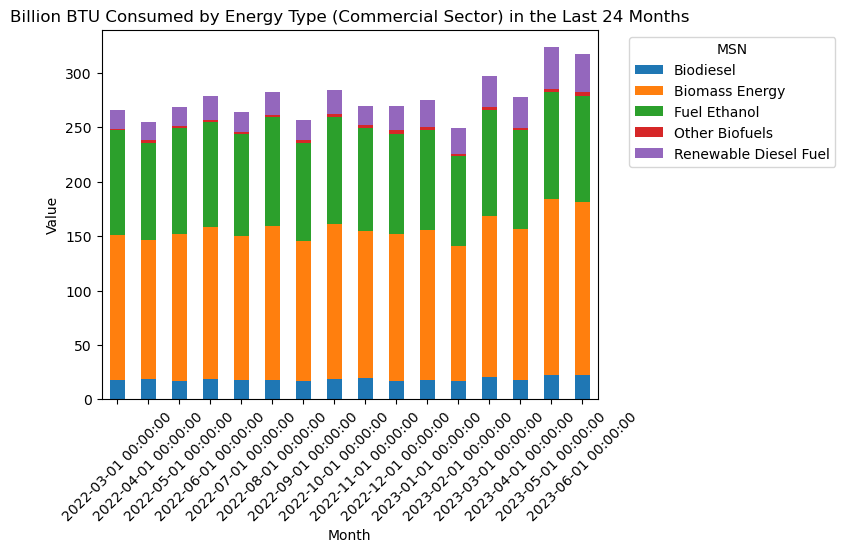

In [93]:
re_df_transportation = renewable_energy_df[renewable_energy_df['Sector'] == 'Transportation Sector']

re_df_transportation_recent_months = re_df_transportation[(re_df_transportation['MSN'] != 'Total Renewable Energy') & 
                                                  ~re_df_transportation['Month'].isnull()].sort_values('Month', ascending=False).head(80)

re_df_transportation_recent_months_pivot = re_df_transportation_recent_months.pivot(index='Month', columns='MSN', values='Value')

plt.figure(figsize=(12, 8))
re_df_transportation_recent_months_pivot.plot(kind='bar', stacked=True)
plt.title('Billion BTU Consumed by Energy Type (Commercial Sector) in the Last 24 Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

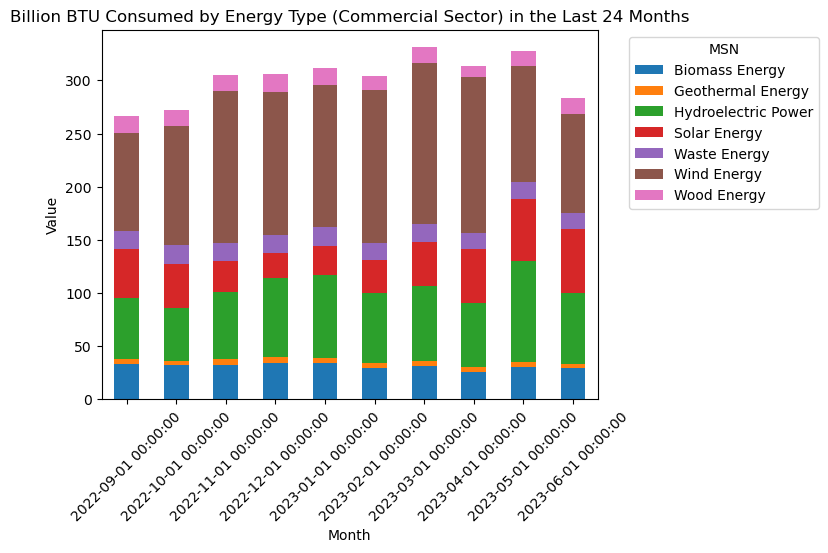

In [94]:
re_df_ep = renewable_energy_df[renewable_energy_df['Sector'] == 'Electric Power Sector']

re_df_ep_recent_months = re_df_ep[(re_df_ep['MSN'] != 'Total Renewable Energy') & 
                                                  ~re_df_ep['Month'].isnull()].sort_values('Month', ascending=False).head(70)

re_df_ep_recent_months_pivot = re_df_ep_recent_months.pivot(index='Month', columns='MSN', values='Value')

plt.figure(figsize=(12, 8))
re_df_ep_recent_months_pivot.plot(kind='bar', stacked=True)
plt.title('Billion BTU Consumed by Energy Type (Commercial Sector) in the Last 24 Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='MSN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

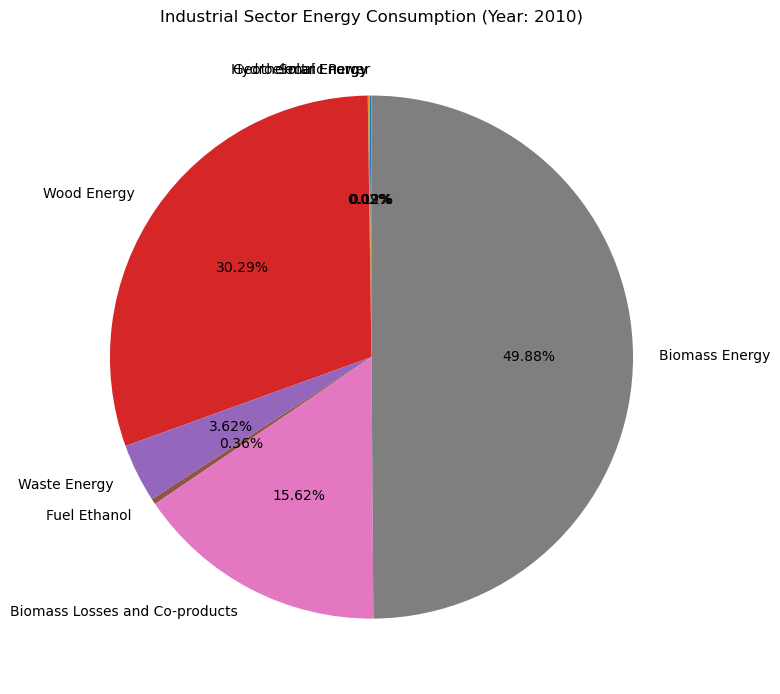

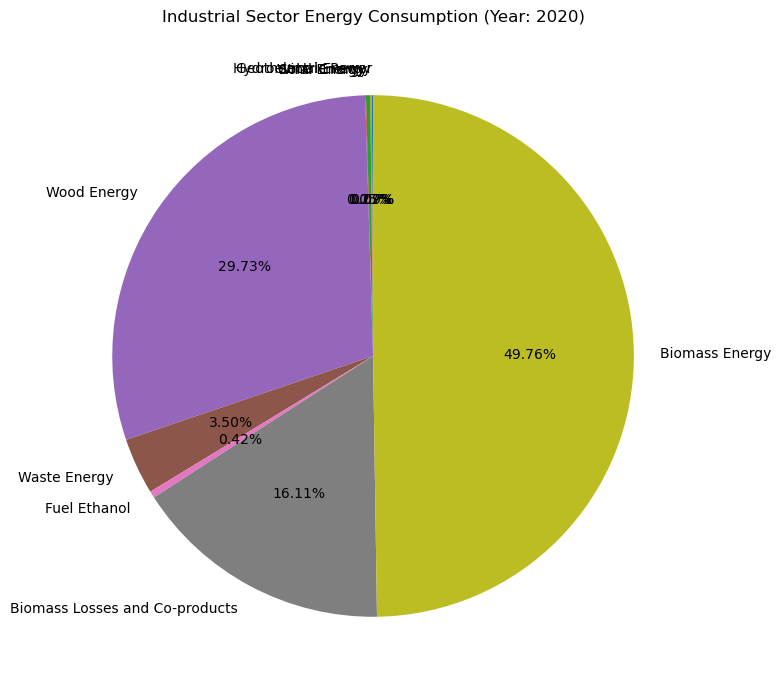

In [109]:
filtered_df_industrial = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Industrial Sector') &
    (renewable_energy_df['Year'].dt.year == 2010) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_industrial['Value'], labels=filtered_df_industrial['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2010)')
plt.tight_layout()
plt.show()

filtered_df_industrial = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Industrial Sector') &
    (renewable_energy_df['Year'].dt.year == 2020) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_industrial['Value'], labels=filtered_df_industrial['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2020)')
plt.tight_layout()
plt.show()

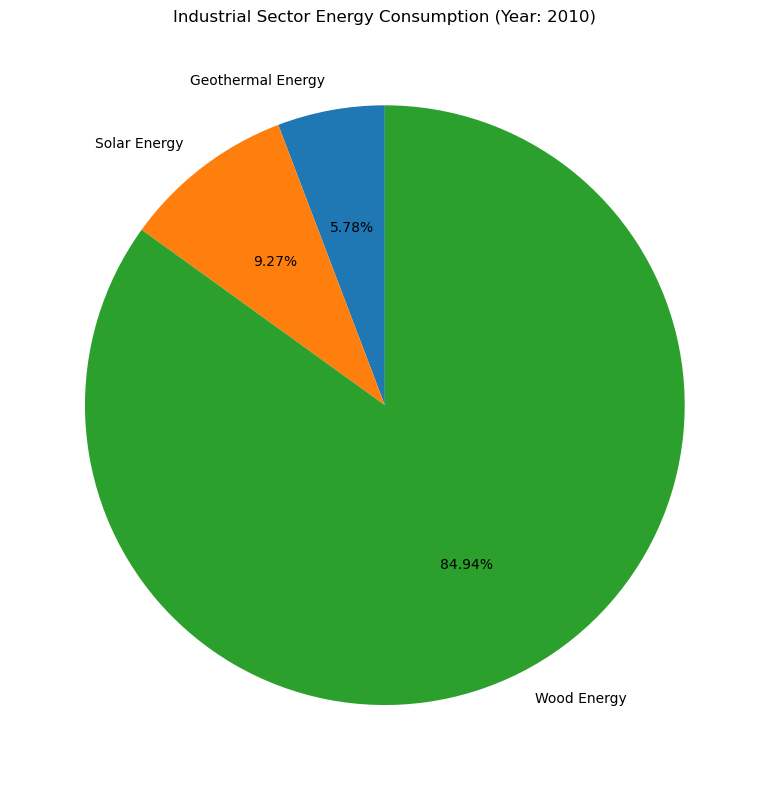

In [105]:
filtered_df_residential = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Residential Sector') &
    (renewable_energy_df['Year'].dt.year == 2010) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_residential['Value'], labels=filtered_df_residential['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2010)')
plt.tight_layout()
plt.show()


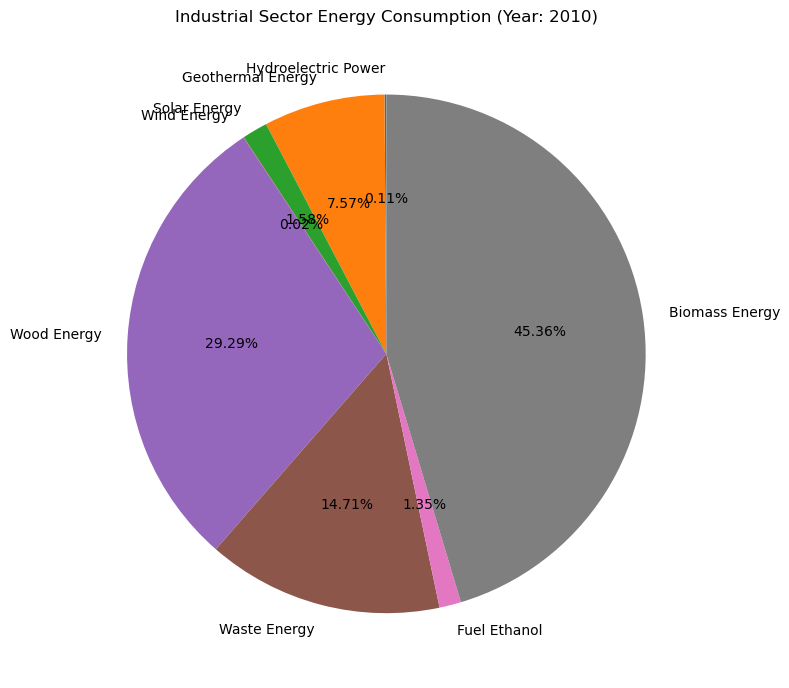

In [106]:
filtered_df_commercial = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Commercial Sector') &
    (renewable_energy_df['Year'].dt.year == 2010) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_commercial['Value'], labels=filtered_df_commercial['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2010)')
plt.tight_layout()
plt.show()

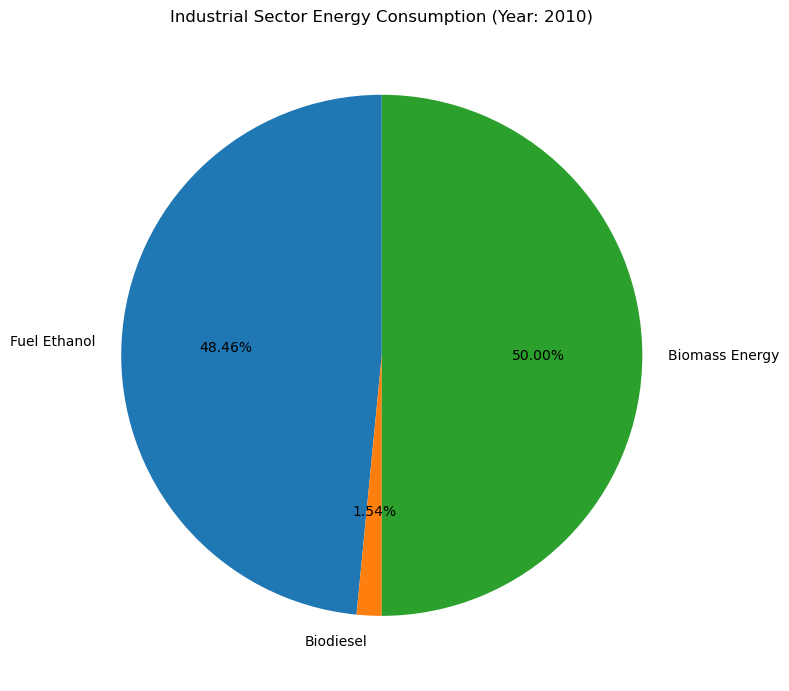

In [107]:
filtered_df_transportation = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Transportation Sector') &
    (renewable_energy_df['Year'].dt.year == 2010) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_transportation['Value'], labels=filtered_df_transportation['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2010)')
plt.tight_layout()
plt.show()

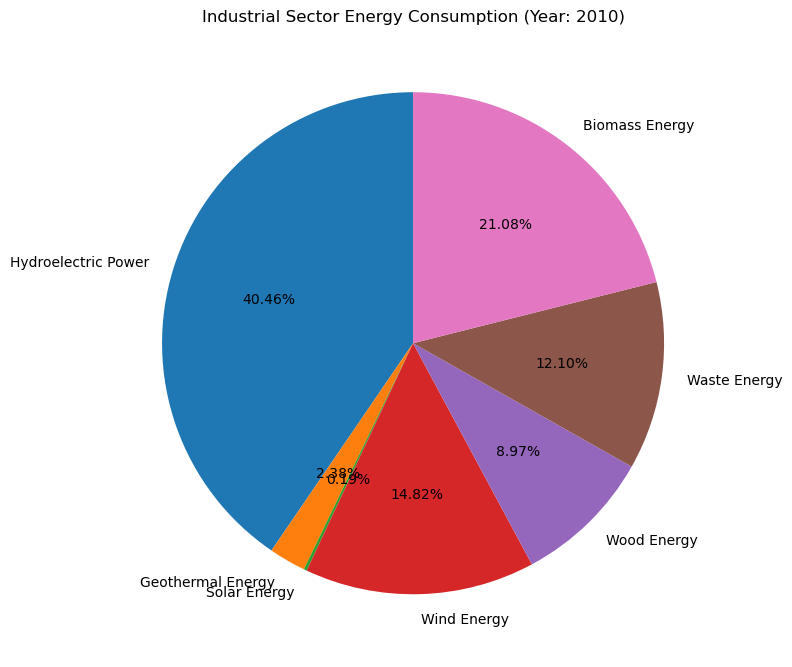

In [108]:
filtered_df_ep = renewable_energy_df[
    (renewable_energy_df['Sector'] == 'Electric Power Sector') &
    (renewable_energy_df['Year'].dt.year == 2010) &
    (renewable_energy_df['Month'].isnull()) &
    (renewable_energy_df['MSN'] != 'Total Renewable Energy') &
    (~renewable_energy_df['Value'].isnull())
]
    
plt.figure(figsize=(8, 8))
plt.pie(filtered_df_ep['Value'], labels=filtered_df_ep['MSN'], autopct='%2.2f%%', startangle=90, labeldistance=1.1)
plt.title('Industrial Sector Energy Consumption (Year: 2010)')
plt.tight_layout()
plt.show()